In [31]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)
dados.head(10)

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes
5,5,14661,2007,55405.26,yes
6,6,9990,2002,93415.61,yes
7,7,11599,2008,65265.09,no
8,8,7834,1999,43917.53,yes
9,9,14913,2003,107860.41,yes


In [32]:
a_renomear = {
    'mileage_per_year': 'milhas_por_ano',
    'model_year': 'ano_do_modelo',
    'price': 'preco',
    'sold': 'vendido'
}
dados = dados.rename(columns=a_renomear)
dados.head(5)

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [33]:
a_trocar = {
    'no': 0,
    'yes':1
}
dados.vendido = dados.vendido.map(a_trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [34]:
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,22
1,1,7843,1998,40557.96,1,24
2,2,7109,2006,89627.50,0,16
3,3,26823,2015,95276.14,0,7
4,4,7935,2014,117384.68,1,8


In [35]:
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,22,35085.22134
1,1,7843,1998,40557.96,1,24,12622.05362
2,2,7109,2006,89627.50,0,16,11440.79806
3,3,26823,2015,95276.14,0,7,43167.32682
4,4,7935,2014,117384.68,1,8,12770.11290


In [36]:
dados = dados.drop(columns = ['Unnamed: 0', 'milhas_por_ano','ano_do_modelo'], axis = 1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,22,35085.22134
1,40557.96,1,24,12622.05362
2,89627.50,0,16,11440.79806
3,95276.14,0,7,43167.32682
4,117384.68,1,8,12770.11290


In [37]:
x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]


import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,test_size = 0.25,
                                                       stratify = y)
print("Treinamos com %d elementos e testamos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi de %.2f%%" % taxa_de_acerto)

Treinamos com 7500 elementos e testamos com 2500 elementos
A acurácia foi de 46.88%


C:\Users\rapha\anaconda3\envs\alura_pandas\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [38]:
from sklearn.dummy import DummyClassifier
dummy_stratified = DummyClassifier()

dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y) * 100

#taxa_de_acerto = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do dummy stratified foi de %.2f%%" % acuracia)

A acurácia do dummy stratified foi de 58.00%


In [39]:
from sklearn.dummy import DummyClassifier
dummy_mostfrequent = DummyClassifier()

dummy_mostfrequent.fit(treino_x, treino_y)
previsoes = dummy_mostfrequent.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do dummy mostfrequent foi de %.2f%%" % taxa_de_acerto)

A acurácia do dummy mostfrequent foi de 58.00%


In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,test_size = 0.25,
                                                     stratify = y)
print("Treinamos com %d elementos e testamos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)


modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi de %.2f%%" % taxa_de_acerto)

Treinamos com 7500 elementos e testamos com 2500 elementos
A acurácia foi de 77.48%


In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,test_size = 0.25,
                                                     stratify = y)
print("Treinamos com %d elementos e testamos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth = 2)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi de %.2f%%" % taxa_de_acerto)

Treinamos com 7500 elementos e testamos com 2500 elementos
A acurácia foi de 76.84%


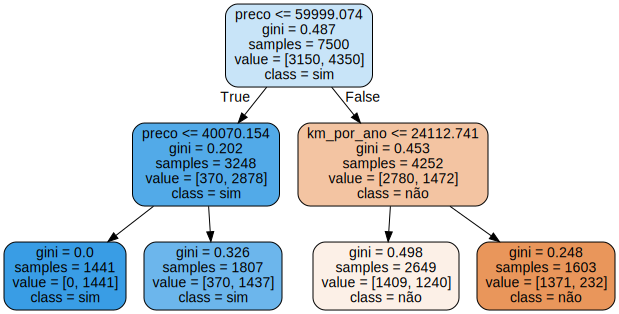

In [53]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo,filled = True, rounded = True, feature_names = features,
                          class_names = ['não','sim'])
grafico = graphviz.Source(dot_data)
grafico